## Medidas de dispersão são medidas estatísticos utilizadas para identificar o grau de variabilidade de um conjunto de dados.
<br>

![alt text](https://www.robertonovaes.com.br/wp-content/uploads/2018/09/variability.jpg)

### As medidas de dispersão mais comuns são a variância, desvio padrão e coeficiente de variação.

### Vamos continuar usando os dados do preço do Big Mac de Julho de 2022.

<br>

https://www.kaggle.com/datasets/vittoriogiatti/bigmacprice

#### Importando a biblioteca pandas (https://pandas.pydata.org)

In [1]:
import pandas

#### Lendo os dados, que estão em csv

In [2]:
df = pandas.read_csv('BigmacPriceJuly2022.csv')

In [3]:
df.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2022-07-01,ARS,Argentina,590.00,129,4.57
1,2022-07-01,AUD,Australia,6.70,1,6.70
2,2022-07-01,EUR,Austria,4.35,1,4.35
3,2022-07-01,AZN,Azerbaijan,4.70,1,4.70
4,2022-07-01,BHD,Bahrain,1.60,1,1.60


### Descrição das colunas

* **`date`** - Data do registro
* **`currency_code`** - Código ISO 4217 internacional da moeda do país
* **`name`** - Nome do país
* **`local_price`** - Preço do Big Mac na moeda local
* **`dollar_ex`** - Taxa de Conversão do dólar americano para a moeda local
* **`local_price`** - Preço do Big Mac em dólares americanos


----

`Variância`

## A variância é uma medida de dispersão que nos ajuda a entender o quão longe da média os dados estão.

### Na prática, a variância é a média do quadrado das distâncias entre cada observação e a média.

![alt_text](https://www.onlinemathlearning.com/image-files/population-variance.png)

### Por que precisamos elevar ao quadrado??

Queremos medir a distância entre cada observação e a média, mas pode ser que alguma observação seja menor do que a média! Nesse caso, somente fazer a diferença entre a observação e a média daria um valor negativo, e acabaria se anulando com as outras distâncias.

In [6]:
lista_exemplo_variancia = [1 , 2, 3 , 4, 5]

In [7]:
def media(lista):
    return sum(lista)/len(lista)

In [8]:
media(lista_exemplo_variancia)

3.0

In [9]:
1 - 3

-2

In [10]:
(1-3) + (2-3) + (3-3) + (4-3) + (5-3)

0

#### Nesse exemplo, todas as distâncias se anulariam e diríamos que os dados não tem variação alguma, o que não é verdade!

In [11]:
(1-3)**2 + (2-3)**2 + (3-3)**2 + (4-3)**2 + (5-3)**2

10

Quando elevamos um número ao quadrado, o resultado é sempre positivo e por isso elevamos as diferenças ao quadrado no caso da variância!

### Vamos tentar implementar a fórmula da variância amostral

In [13]:
def variancia_amostral(lista):
    media_lista = media(lista)
    tamanho_lista = len(lista)
    
    lista_distancias_quadradas = []
    for observacao in lista:
        distancia_quadrada = (observacao - media_lista) ** 2
        lista_distancias_quadradas.append(distancia_quadrada)
    
    variancia = sum(lista_distancias_quadradas)/tamanho_lista
    
    return variancia

In [14]:
variancia_amostral(lista_exemplo_variancia)

2.0

#### Podemos usar um pacote pronto para calcular a variância, não é necessário implementar toda vez

In [15]:
import numpy as np

In [17]:
np.var(lista_exemplo_variancia)

2.0

### É bem tranquilo calcular a variância com pandas

In [18]:
df['dollar_price'].var()

1.8311856107660458

Essa é a variância do preço do Big Mac no mundo, em dólares

### Assim como a média, a variância é facilmente influenciada por valores extremos!

Lista equilibrada

In [21]:
lista_alturas_1 = [1.67, 1.72, 1.70, 1.69, 1.74, 1.71]

In [22]:
media(lista_alturas_1)

1.705

In [23]:
np.var(lista_alturas_1)

0.0004916666666666675

Lista mais espaçada

In [24]:
lista_alturas_2 = [1.60, 1.66, 1.72, 1.69, 1.78, 1.77]

In [25]:
media(lista_alturas_2)

1.7033333333333331

In [26]:
np.var(lista_alturas_2)

0.0038888888888888883

Lista com uma altura bem menor do que as outras

In [27]:
lista_alturas_3 = [1.20, 1.72, 1.70, 1.69, 1.74, 1.71]

In [28]:
media(lista_alturas_3)

1.626666666666667

In [29]:
np.var(lista_alturas_3)

0.03665555555555556

Lista com uma altura bem maior do que as outras

In [30]:
lista_alturas_4 = [1.67, 1.72, 1.70, 1.69, 1.74, 2.24]

In [31]:
media(lista_alturas_4)

1.7933333333333332

In [32]:
np.var(lista_alturas_4)

0.040388888888888926

## Viu o que acontece com a variância?

---

`Desvio Padrão`

## No cálculo da variância, elevamos as diferenças ao quadrado para que as distaâncias sejam positivas. Entretanto, ao fazer isso, a variância acaba ficando numa escala diferente dos dados, porque está em uma escala quadrática. Por isso, utilizamos o `desvio padrão`, que nada mais é do que a raiz quadrada da variância.

<br>


![alt_text](https://toptipbio.com/wp-content/uploads/2021/09/Standard-deviation-formula.jpg)

<br>
<br>

### Vamos ver um exemplo do cálculo do desvio padrão

![alt_text](https://1.bp.blogspot.com/-uuORHtcAzvM/V0Hyje4xMQI/AAAAAAAACNY/U9NlBu-FQxQDZxYpgtoONviPXO8q9RgIQCLcB/s1600/chat.jpg)

### É simples calcular a desvio padrão com pandas

In [34]:
df['dollar_price'].std()

1.3532130692415167

Esse é o desvio padrão do preço do Big Mac no mundo, em dólares

#### Podemos usar um pacote pronto para calcular o desvio padrão

In [37]:
np.std(lista_exemplo_variancia)

1.4142135623730951

### Como o desvio padrão é a raiz quadrada da variância, ele também vai, assim como a média, ser facilmente influenciada por valores extremos

---

`Coeficiente de Variação`

## Com o desvio padrão, temos uma medida de dispersão na mesma escala dos nossos dados. Entretanto, como saber se os dados são muito variados ou pouco? Como saber se o nosso desvio padrão é pequeno ou grande? Para isso, temos o `Coeficiente de Variação`!
<br>

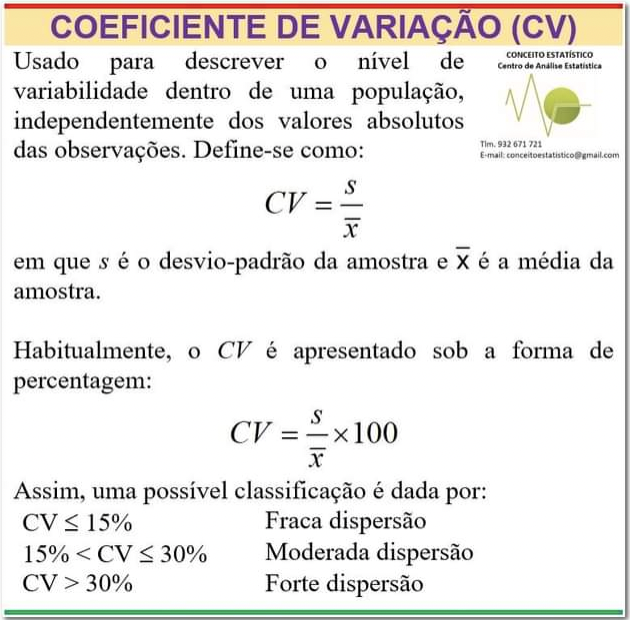

#### O coeficiente de variação é o quociente entre o desvio padrão e a média e, já que multiplicamos por 100, ele vira uma porcentagem. Quanto maior essa porcentagem, podemos dizer que mais distantes da média os dados estão e, consequentemente, mais variados os dados estão.

#### Vamos calcular o coeficiente de variação do preço do Big Mac em dólares

In [40]:
coeficiente_variacao_big_mac = 100 * df['dollar_price'].std()/df['dollar_price'].mean()
coeficiente_variacao_big_mac

33.800148027441985

#### Os dados são bastante dispersos!